# **EKSTRAKSI KATA (PAGE RANK)**



## Pagerank
**PageRank** adalah algoritma yang digunakan oleh mesin pencari, terutama oleh Google, untuk menilai dan memberikan peringkat pada halaman web dalam hasil pencarian. Algoritma ini dikembangkan oleh Larry Page dan Sergey Brin, pendiri Google, dan dinamakan setelah nama Larry Page. PageRank mengukur otoritas atau kepentingan suatu halaman web berdasarkan seberapa banyak halaman lain yang mengaitkan ke halaman tersebut dan seberapa pentingnya halaman-halaman yang memberikan tautan tersebut.

Dalam kasus kali ini PageRank mengukur otoritas atau kepentingan suatu kata berdasarkan seberapa banyak kata lain yang mengaitkan ke kata tersebut dan seberapa pentingnya kata-kata yang memberikan tautan tersebut.

### **Algoritma Pagerank**


1.   Identifikasi kata-kata yang akan dievaluasi.
2.   Buat graph antar kata dengan tautan antar kata.
3.   Inisialisasi pagerank, Setiap halaman web diberikan nilai awal PageRank yang sama.
4.   Kemudian lakukan iterasi perhitungan pagerank.

**Rumus Pagerank :**

$\text{PR(A)}=\frac{d}{N} + \left( 1 - d\right)\left( \sum_{}^{} \frac{\text{Rank(i)}}{Outlink(i)} \right)$



*   PR(i) adalah PageRank dari kata A
*   d adalah faktor damping (biasanya 0.85 untuk Google PageRank)
*   N adalah jumlah total kata




In [1]:
import pandas as pd
import numpy as np

## Menampilkan Dataset

In [2]:
df = pd.read_csv('/content/drive/MyDrive/PPW/TUGAS/Data Berita newsdetik.csv')

In [3]:
df.isnull().sum()

Judul       0
Tanggal     0
Artikel     0
Category    0
dtype: int64

In [4]:
df.dropna(inplace=True)

In [5]:
df = df.drop_duplicates(subset=['Judul', 'Artikel'])
df

,Judul,Tanggal,Artikel,Category
0,"Gus Imin Janjikan Khitan Ditanggung JKN, BPJS ...","Senin, 27 Nov 2023 13:44 WIB",Cawapres nomor urut 1 Muhaimin Iskandar atau G...,Finance
1,Kementerian BUMN Punya Solusi Selamatkan Waski...,"Senin, 27 Nov 2023 13:43 WIB",Saham PT Waskita Karya (Persero) Tbk terancam ...,Finance
2,"Sedot Sepertiga Uang Negara, Pemda Diminta Mel...","Senin, 27 Nov 2023 13:33 WIB","Menteri Keuangan, Sri Mulyani Indrawati, menje...",Finance
3,Pertagas Raih Gold Rating di Ajang Asia Sustai...,"Senin, 27 Nov 2023 13:31 WIB",PT Pertamina Gas (Pertagas) yang merupakan bag...,Finance
4,Petani Tembakau Jabar Ramai-ramai Tolak Aturan...,"Senin, 27 Nov 2023 13:28 WIB",Ratusan petani dan komunitas pertembakauan di ...,Finance
...,...,...,...,...
1617,"Seandainya Ada Team Order dari Ducati, Jorge M...","Senin, 09 Okt 2023 20:10 WIB",Persaingan ketat di antara Francesco Bagnaia d...,Sport
1618,"Yamaha Mau VR46 Racing Jadi Tim Satelit, tapi...","Senin, 09 Okt 2023 19:30 WIB",Yamaha ingin mempunyai tim satelit lagi musim ...,Sport
1619,Tim Kempo Indonesia Sabet 4 Emas di Kejuaraan ...,"Senin, 09 Okt 2023 18:50 WIB",Tim Kempo Indonesia bersinar di Negeri Sakura ...,Sport
1620,Jadwal MotoGP Mandalika Akhir Pekan Ini,"Senin, 09 Okt 2023 18:15 WIB",Jadwal MotoGP Mandalika akhir pekan ini bisa d...,Sport


## Cleaning

In [6]:
import re, string

# Text Cleaning
def cleaning(text):
    # Menghapus tag HTML
    text = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});').sub('', str(text))

    # Mengubah seluruh teks menjadi huruf kecil
    text = text.lower()

    # Menghapus spasi pada teks
    text = text.strip()

    # Menghapus Tanda Baca, karakter spesial, and spasi ganda
    text = re.compile('<.*?>').sub('', text)
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    text = re.sub('\s+', ' ', text)
    text = re.sub("â½ïgoal", "", text)
    text = re.sub("SCROLL TO CONTINUE WITH CONTENT", "", text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)


    # Menghapus Nomor
    text = re.sub(r'\[[0-9]*\]', ' ', text)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d', ' ', text)
    text = re.sub(r'\s+', ' ', text)

    # Mengubah text yang berisi 'nan' dengan whitespace agar nantinya dapat dihapus
    text = re.sub('nan', '', text)

    return text

In [7]:
df['Artikel'] = df['Artikel'].apply(lambda x: cleaning(x))

## Tokenize

In [8]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [9]:
df['isi_tokens'] = df['Artikel'].apply(lambda x: word_tokenize(x))
df[["Artikel", "isi_tokens"]].head()

,Artikel,isi_tokens
0,cawapres nomor urut muhaimin iskandar atau gus...,"[cawapres, nomor, urut, muhaimin, iskandar, at..."
1,saham pt waskita karya persero tbk terancam di...,"[saham, pt, waskita, karya, persero, tbk, tera..."
2,menteri keuangan sri mulyani indrawati menjela...,"[menteri, keuangan, sri, mulyani, indrawati, m..."
3,pt pertamina gas pertagas yang merupakan bagia...,"[pt, pertamina, gas, pertagas, yang, merupakan..."
4,ratusan petani dan komunitas pertembakauan di ...,"[ratusan, petani, dan, komunitas, pertembakaua..."


## Stopwords

In [10]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
from nltk.corpus import stopwords
from itertools import chain

stop_words = set(chain(stopwords.words('indonesian')))
df['isi_tokens'] = df['isi_tokens'].apply(lambda x: [w for w in x if not w in stop_words])

In [12]:
df['Artikel'] = df['isi_tokens'].apply(lambda tokens: ' '.join(tokens))

In [13]:
df.head()

,Judul,Tanggal,Artikel,Category,isi_tokens
0,"Gus Imin Janjikan Khitan Ditanggung JKN, BPJS ...","Senin, 27 Nov 2023 13:44 WIB",cawapres nomor urut muhaimin iskandar gus imin...,Finance,"[cawapres, nomor, urut, muhaimin, iskandar, gu..."
1,Kementerian BUMN Punya Solusi Selamatkan Waski...,"Senin, 27 Nov 2023 13:43 WIB",saham pt waskita karya persero tbk terancam di...,Finance,"[saham, pt, waskita, karya, persero, tbk, tera..."
2,"Sedot Sepertiga Uang Negara, Pemda Diminta Mel...","Senin, 27 Nov 2023 13:33 WIB",menteri keuangan sri mulyani indrawati pemerin...,Finance,"[menteri, keuangan, sri, mulyani, indrawati, p..."
3,Pertagas Raih Gold Rating di Ajang Asia Sustai...,"Senin, 27 Nov 2023 13:31 WIB",pt pertamina gas pertagas subholding gas perta...,Finance,"[pt, pertamina, gas, pertagas, subholding, gas..."
4,Petani Tembakau Jabar Ramai-ramai Tolak Aturan...,"Senin, 27 Nov 2023 13:28 WIB",ratusan petani komunitas pertembakauan sumedan...,Finance,"[ratusan, petani, komunitas, pertembakauan, su..."


## Co-Occurency Matriks

In [14]:
df['Artikel'][0]

'cawapres nomor urut muhaimin iskandar gus imin biaya khita ditanggung bpjs kesehatan capres anies baswedan meg pilpres asisten deputi komunikasi publik hubungan masyarakat bpjs kesehatan agustian fardianto ardi sunat khitan prosedur medis biayanya ditanggung pemerintah bpjs mengacu perpres no jami kesehatan terkait penjami sunat khitan sesuai peraturan presiden republik indonesia nomor tindakan sunat khitan penjami program jkn ardi detikcom senin scroll to continue with content ardi menutup kemungki prosedur sunat khitan ditanggung bpjs menurutnya biaya khita ditanggung negara bersangkutan memiliki penyakit kondisi medis mengharuskan tindakan penyakit kondisi medis alat kelamin pria mengharuskan tindakan sunat khitan dijamin program jkn sesuai indikasi medis ardi biaya sunat khitan ditanggung pemerintah bersangkutan diharuskan medis menerima prosedur medis kondisi bersangkutan diwajibkan medis khita kareya permasalahan ardi mengimbau masyarakat status kepesertaannya aktif menerima pro

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(tokenizer=lambda x: x.split())
X = vectorizer.fit_transform([df['Artikel'][0]])

co_occurrence_matrix = (X.T * X)
co_occurrence_matrix.setdiag(0)

co_occurrence_df = pd.DataFrame(co_occurrence_matrix.toarray(), columns=vectorizer.get_feature_names_out(),index=vectorizer.get_feature_names_out())
co_occurrence_df

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,agustian,aktif,alat,amin,anies,aplikasi,ardi,asisstant,asisten,barat,...,sesuai,status,sunat,tambahan,terkait,ti,tindakan,to,urut,with
agustian,0,2,1,2,2,1,5,1,1,1,...,3,2,6,1,1,2,3,1,1,1
aktif,2,0,2,4,4,2,10,2,2,2,...,6,4,12,2,2,4,6,2,2,2
alat,1,2,0,2,2,1,5,1,1,1,...,3,2,6,1,1,2,3,1,1,1
amin,2,4,2,0,4,2,10,2,2,2,...,6,4,12,2,2,4,6,2,2,2
anies,2,4,2,4,0,2,10,2,2,2,...,6,4,12,2,2,4,6,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ti,2,4,2,4,4,2,10,2,2,2,...,6,4,12,2,2,0,6,2,2,2
tindakan,3,6,3,6,6,3,15,3,3,3,...,9,6,18,3,3,6,0,3,3,3
to,1,2,1,2,2,1,5,1,1,1,...,3,2,6,1,1,2,3,0,1,1
urut,1,2,1,2,2,1,5,1,1,1,...,3,2,6,1,1,2,3,1,0,1


## Graph Co-occurency

In [16]:
import matplotlib.pyplot as plt
import networkx as nx
from itertools import combinations
G = nx.DiGraph()
for idx, row in co_occurrence_df.iterrows():
    for col in co_occurrence_df.columns:
        weight = co_occurrence_df.loc[idx, col]
        if weight > 50 and idx != col:
            G.add_edge(idx, col, weight=weight)

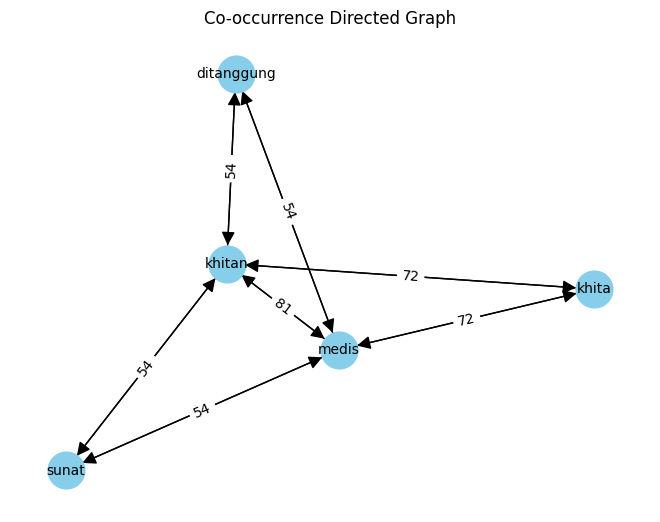

In [17]:
# Menampilkan graf
pos = nx.spring_layout(G)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=10, font_color='black', arrowsize=20)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Co-occurrence Directed Graph")
plt.show()

## Closeness Centrality

In [18]:
closeness_centrality = nx.closeness_centrality(G)
print("Closeness Centrality:")
for node, closeness in sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True):
    print(f"{node}: {closeness}")

Closeness Centrality:
khitan: 1.0
medis: 1.0
ditanggung: 0.6666666666666666
khita: 0.6666666666666666
sunat: 0.6666666666666666


## PageRank Centrality

In [19]:
pagerank = nx.pagerank(G)
print("\nPageRank:")
for node, rank in sorted(pagerank.items(), key=lambda x: x[1], reverse=True):
    print(f"{node}: {rank}")


PageRank:
khitan: 0.28684822781318925
medis: 0.28684822781318925
khita: 0.16452141774944873
ditanggung: 0.13089106331208655
sunat: 0.13089106331208655


In [20]:
df['Artikel'][0]

'cawapres nomor urut muhaimin iskandar gus imin biaya khita ditanggung bpjs kesehatan capres anies baswedan meg pilpres asisten deputi komunikasi publik hubungan masyarakat bpjs kesehatan agustian fardianto ardi sunat khitan prosedur medis biayanya ditanggung pemerintah bpjs mengacu perpres no jami kesehatan terkait penjami sunat khitan sesuai peraturan presiden republik indonesia nomor tindakan sunat khitan penjami program jkn ardi detikcom senin scroll to continue with content ardi menutup kemungki prosedur sunat khitan ditanggung bpjs menurutnya biaya khita ditanggung negara bersangkutan memiliki penyakit kondisi medis mengharuskan tindakan penyakit kondisi medis alat kelamin pria mengharuskan tindakan sunat khitan dijamin program jkn sesuai indikasi medis ardi biaya sunat khitan ditanggung pemerintah bersangkutan diharuskan medis menerima prosedur medis kondisi bersangkutan diwajibkan medis khita kareya permasalahan ardi mengimbau masyarakat status kepesertaannya aktif menerima pro

## Rangking Kata Penting dari hasil Centrality

In [21]:
ranking_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Kata Kunci dari berita diatas menggunakan closeness berdasarkan urutan (Rank):")
for i, (node, closeness) in enumerate(ranking_closeness, 1):
    print(f"Rank {i}: {node} nilai closeness {closeness}")

Kata Kunci dari berita diatas menggunakan closeness berdasarkan urutan (Rank):
Rank 1: khitan nilai closeness 1.0
Rank 2: medis nilai closeness 1.0
Rank 3: ditanggung nilai closeness 0.6666666666666666
Rank 4: khita nilai closeness 0.6666666666666666
Rank 5: sunat nilai closeness 0.6666666666666666


In [22]:
ranking_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:10]
print("Kata Kunci dari berita diatas menggunakan pagerank berdasarkan urutan (Rank):")
for i, (node, pagerank) in enumerate(ranking_pagerank, 1):
    print(f"Rank {i}: {node} nilai Pagerank {pagerank}")

Kata Kunci dari berita diatas menggunakan pagerank berdasarkan urutan (Rank):
Rank 1: khitan nilai Pagerank 0.28684822781318925
Rank 2: medis nilai Pagerank 0.28684822781318925
Rank 3: khita nilai Pagerank 0.16452141774944873
Rank 4: ditanggung nilai Pagerank 0.13089106331208655
Rank 5: sunat nilai Pagerank 0.13089106331208655
